In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("personality_dataset.csv")

In [ ]:
df.info(),df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


(None,
 Time_spent_Alone             0
 Stage_fear                   0
 Social_event_attendance      0
 Going_outside                0
 Drained_after_socializing    0
 Friends_circle_size          0
 Post_frequency               0
 Personality                  0
 dtype: int64)

In [ ]:
df2 = df.replace({"Stage_fear":{"Yes":1,"No":0}, "Drained_after_socializing":{"Yes":1,"No":0},"Personality":{"Extrovert":1,"Introvert":0}})
display(df2.head())

/tmp/ipython-input-83-1163147655.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df.replace({"Stage_fear":{"Yes":1,"No":0}, "Drained_after_socializing":{"Yes":1,"No":0},"Personality":{"Extrovert":1,"Introvert":0}})


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


In [ ]:
df2["Personality"].value_counts()

,count
Personality,
1,1491
0,1409


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = df2.drop("Personality",axis=1)
y = df2["Personality"]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((2030, 7), (870, 7))

In [ ]:
def Ann(X_train,X_test,y_train,y_test):
  model = keras.Sequential([
      keras.layers.Dense(10,input_shape=(X_train.shape[1],),activation="relu"),
      keras.layers.Dense(10,activation="relu"),
      keras.layers.Dense(10,activation="relu"),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1,activation="sigmoid")
  ])
  model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
  model.fit(X_train,y_train,epochs=50)
  return model,model.predict(X_test)

In [ ]:
model,y_pred = Ann(X_train,X_test,y_train,y_test)
for i in range(len(y_pred)):
  if y_pred[i]>0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6832 - loss: 0.6603
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8109 - loss: 0.5370
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9181 - loss: 0.3972
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9075 - loss: 0.3579
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9027 - loss: 0.3354
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9177 - loss: 0.3227
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9028 - loss: 0.3220
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9070 - loss: 0.3538
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9113 - loss: 0.3159
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8995 - loss: 0.3312
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9216 - loss: 0.2972
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8982 - loss: 0.3262


In [ ]:
y_pred[:5],y_test[:5]

(array([[0.],
        [1.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 141     0
 1557    1
 485     0
 1712    0
 2250    0
 Name: Personality, dtype: int64)

Text(95.72222222222221, 0.5, 'Truth')

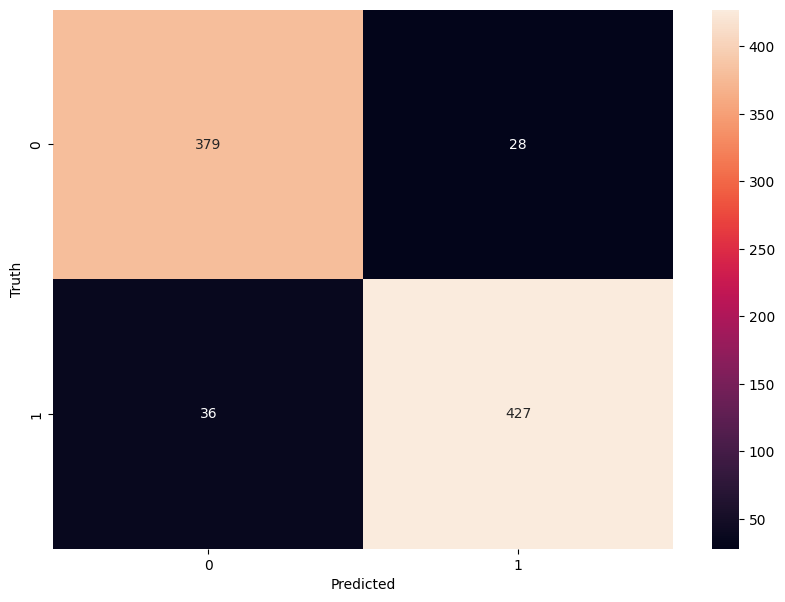

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
model.evaluate(X_test,y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9305 - loss: 0.2573


[0.2622055113315582, 0.9264367818832397]